In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
# New colormap including gridline color
colors = ['#000000','#1E93FF','#F93C31','#4FCC30','#FFDC00',
'#999999','#E53AA3','#FF851B','#87D8F1','#921231','#555555']
colormap = plt.matplotlib.colors.ListedColormap(colors)

In [3]:
base_path = './kaggle/input/arc-prize-2024/'
# Copied from the starter EDA notebook
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [4]:
training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path + 'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path + 'arc-agi_evaluation_solutions.json')

test_challenges = load_json(base_path + 'arc-agi_test_challenges.json')

In [14]:
task_ids = []
for key, value  in evaluation_challenges.items():
    task_ids.append(key)
    print(key, len(value['test']),len(value['train']))
    # for i, _ in enumerate(value['test']):
    #     print(value['test'][i]['input'])
    # for i , _ in enumerate(value['train']):
    #     print(value['train'][i]['input'])
    #     print(value['train'][i]['output'])
print(len(task_ids))

00576224 1 2
009d5c81 1 5
00dbd492 1 4
03560426 1 3
05a7bcf2 1 3
0607ce86 1 3
0692e18c 1 3
070dd51e 1 2
08573cc6 1 3
0934a4d8 1 4
09c534e7 1 3
0a1d4ef5 1 3
0a2355a6 1 4
0b17323b 1 2
0bb8deee 1 3
0becf7df 1 3
0c786b71 1 3
0c9aba6e 1 4
0d87d2a6 1 3
0e671a1a 1 4
0f63c0b9 1 4
103eff5b 1 2
11e1fe23 1 2
12422b43 1 5
12997ef3 2 4
12eac192 1 4
136b0064 1 3
13713586 1 3
137f0df0 1 3
140c817e 1 3
14754a24 1 4
15113be4 1 3
15663ba9 1 3
15696249 1 4
16b78196 1 2
17b80ad2 1 4
17cae0c1 1 4
18419cfa 1 3
184a9768 1 3
195ba7dc 1 4
1990f7a8 1 3
19bb5feb 1 3
1a2e2828 1 5
1a6449f1 1 3
1acc24af 1 4
1c02dbbe 1 3
1c0d0a4b 1 3
1c56ad9f 1 4
1d0a4b61 1 3
1d398264 2 3
1da012fc 1 2
1e81d6f9 1 3
1e97544e 1 3
2037f2c7 1 3
2072aba6 1 3
20818e16 1 3
20981f0e 1 3
212895b5 1 3
21f83797 1 2
22a4bbc2 1 4
25094a63 1 2
2546ccf6 1 2
256b0a75 1 3
2685904e 1 6
2697da3f 1 4
2753e76c 1 3
27a77e38 1 3
27f8ce4f 1 4
281123b4 1 6
292dd178 1 3
29700607 1 3
2a5f8217 1 3
2b01abd0 1 3
2c0b0aff 1 4
2c737e39 1 3
2f0c5170 1 3
310f3251 1 5

In [5]:
# Change to display other examples from the training set
example_id = 'e179c5f4'

In [16]:
# Get the grids out of the json maze and convert to tensors
toy_train_x = []
toy_train_y = []
for example in training_challenges[example_id]['train']:
    toy_train_x.append(example['input'])
    toy_train_y.append(example['output'])

toy_valid_x = []
toy_valid_y = []    

for i, example in enumerate(training_challenges[example_id]['test']):
    toy_valid_x.append(training_challenges[example_id]['test'][i]['input'])
    toy_valid_y.append(training_solutions[example_id][i])


Original Grids


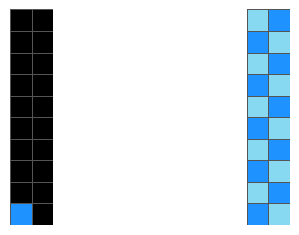

Mapped Grids


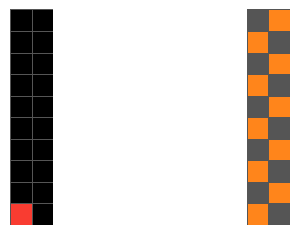

Remapped Grids


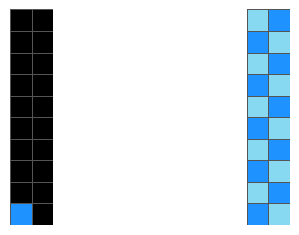

In [33]:
import torch
import numpy as np
import random

def set_seed(seed):
    # Python의 랜덤 시드 설정
    random.seed(seed)
    
    # Numpy의 랜덤 시드 설정
    np.random.seed(seed)
    
    # PyTorch의 랜덤 시드 설정
    torch.manual_seed(seed)
    
    # GPU 사용 시 CUDA 시드 고정
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # 다중 GPU 사용 시 모든 GPU에 대해 시드 설정

    # cudnn 관련 옵션 설정
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 시드를 고정하려면 다음과 같이 호출합니다.
set_seed(42)


def show_grid_side_by_side(*grids):
    num_grids = len(grids)
    fig, axes = plt.subplots(1, num_grids, figsize=(num_grids * 2.8, 2.8))

    if num_grids == 1:
        axes = [axes]  # 리스트로 변환하여 일관성 유지
    
    for ax, grid in zip(axes, grids):
        if grid.ndim == 4:
            grid = grid.squeeze()  # [1, 1, 30, 30] -> [30, 30]로 변환
        elif grid.ndim == 3:
            grid = grid[0]  # [1, 30, 30] -> [30, 30]로 변환
            
        ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')

    plt.show()

# Grids를 얻어와서 tensor로 변환
toy_train_x = []
toy_train_y = []
for example in training_challenges[example_id]['train']:
    toy_train_x.append(torch.tensor(example['input']))
    toy_train_y.append(torch.tensor(example['output']))

toy_valid_x = []
toy_valid_y = []    

for i, example in enumerate(training_challenges[example_id]['test']):
    toy_valid_x.append(torch.tensor(training_challenges[example_id]['test'][i]['input']))
    toy_valid_y.append(torch.tensor(training_solutions[example_id][i]))

# show_grid_side_by_side 함수를 사용해 시각화
print("Original Grids")
show_grid_side_by_side(toy_train_x[0], toy_train_y[0])

# 매핑 함수 적용
def mapping_input(tensor):
    mapping = {
        1: random.randint(1, 10),
        2: random.randint(11, 20),
        3: random.randint(21, 30),
        4: random.randint(31, 40),
        5: random.randint(41, 50),
        6: random.randint(51, 60),
        7: random.randint(61, 70),
        8: random.randint(71, 80),
        9: random.randint(81, 90),
        10: random.randint(91, 100)
    }
    temp_tensor = tensor.clone()
    for k in mapping:
        temp_tensor[temp_tensor == k] = -k  # 임시로 기존 값에 음수를 취해 중복을 피함

    # 최종 매핑 적용
    for k, v in mapping.items():
        temp_tensor[temp_tensor == -k] = v
    return temp_tensor, mapping

# 매핑 후 시각화
mapped_x, mapping_x = mapping_input(toy_train_x[0])
mapped_y, mapping_y = mapping_input(toy_train_y[0])
print("Mapped Grids")
show_grid_side_by_side(mapped_x, mapped_y)

# 리매핑 함수 적용
def remapping_input(tensor):
    # 범위별 매핑 딕셔너리
    remapping = {
        (1, 10): 1,
        (11, 20): 2,
        (21, 30): 3,
        (31, 40): 4,
        (41, 50): 5,
        (51, 60): 6,
        (61, 70): 7,
        (71, 80): 8,
        (81, 90): 9,
        (91, 100): 10
    }
    
    temp_tensor = tensor.clone()

    # 각 범위에 대해 매핑 수행
    for value_range, new_value in remapping.items():
        mask = (temp_tensor >= value_range[0]) & (temp_tensor <= value_range[1])
        temp_tensor[mask] = new_value

    return temp_tensor

# 리매핑 후 시각화
# remapped_x = remapping_input(mapped_x, mapping_x)
# remapped_y = remapping_input(mapped_y, mapping_y)
remapped_x = remapping_input(mapped_x)
remapped_y = remapping_input(mapped_y)
print("Remapped Grids")
show_grid_side_by_side(remapped_x, remapped_y)


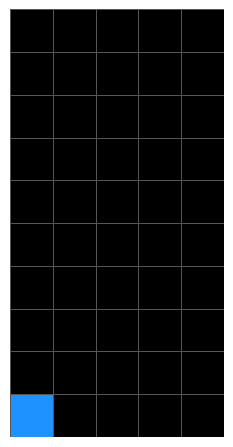

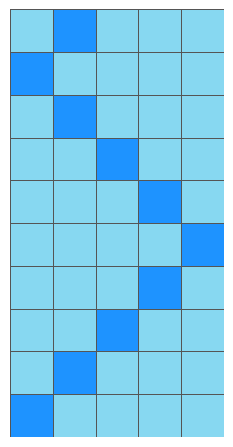

In [17]:
# Display an array of grids
def show_grids(grids):
    nrows, ncols = 1, max(5, len(grids))
    fig = plt.figure(figsize=(16,16))
    for i, grid in enumerate(grids):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
    plt.show()

show_grids(toy_valid_x)
show_grids(toy_valid_y)

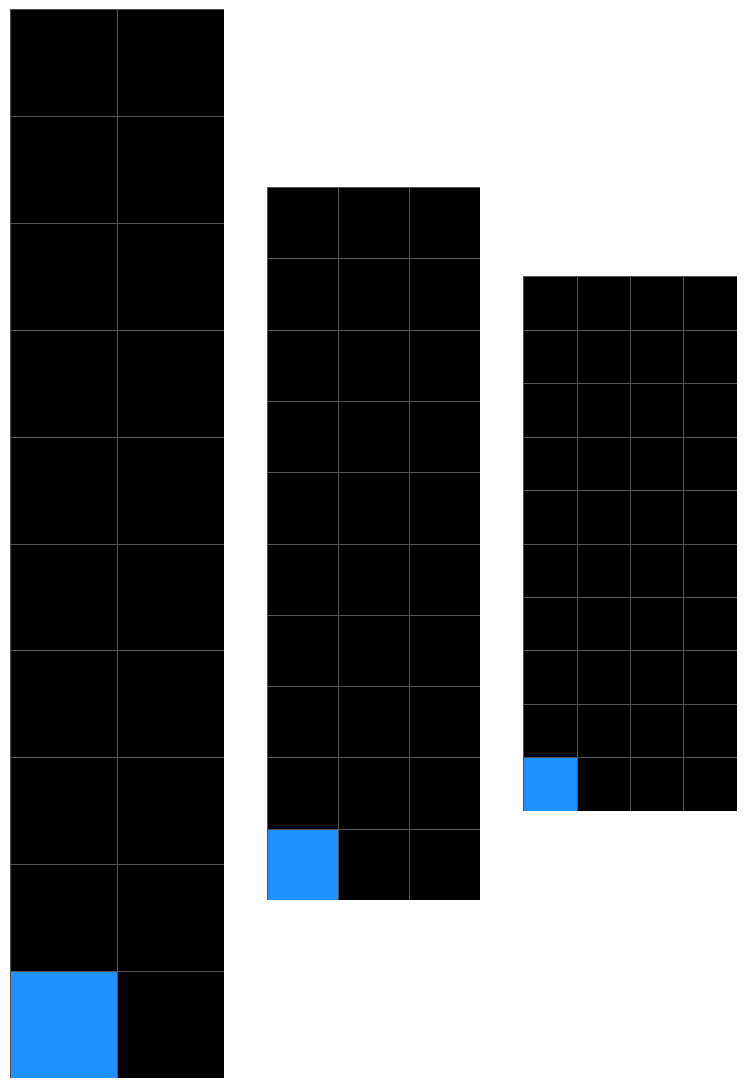

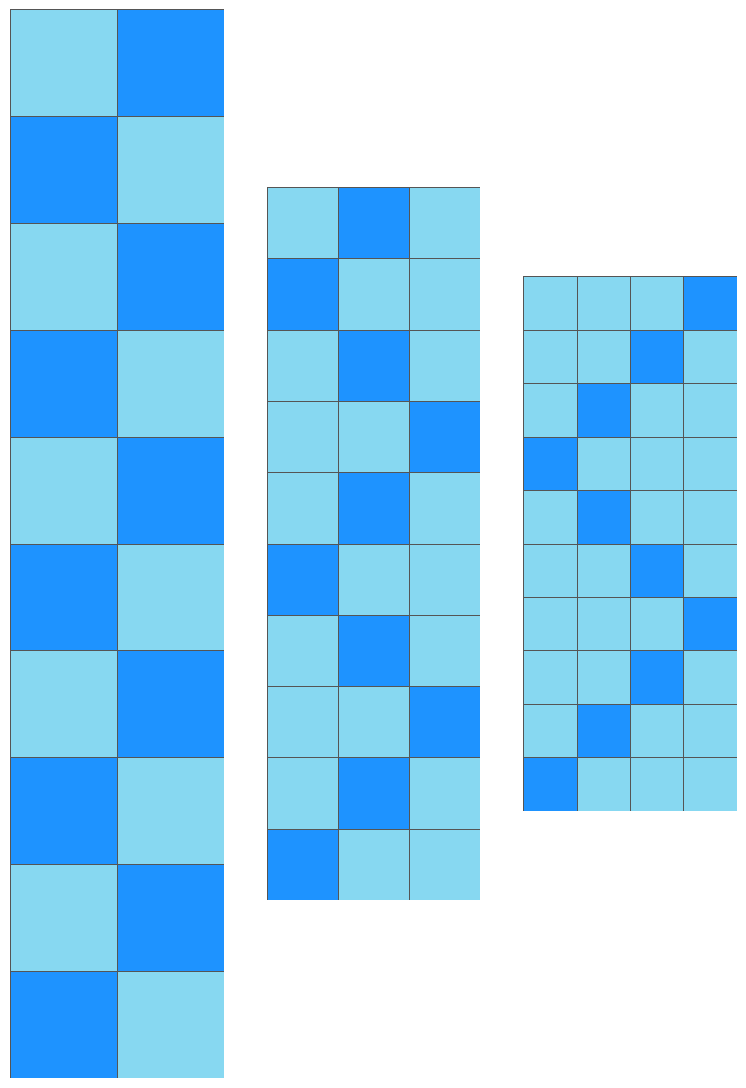

In [18]:
show_grids(toy_train_x)
show_grids(toy_train_y)